**Lab 5: Intro to Atlas Data Pt. 2**  
Jeffrey Patrick  
Phys 427 February 11th, 2020  

A Lorentz 4 Vector contains both the energy and momentum, or space and time, of a particle in one vector that doesn't change under coordinate transformations. The Invariant Mass of a particle is the magnitude of the particle's Lorentz 4 Vector, $E^2 - p^2$, and is the particle's mass in its own rest frame. These are both important terms to know because with them we can solve for things such as the mass of the Higgs Boson. Knowing the Lorentz 4 Vectors of two resulting particles after a decay, we can solve for the mass of the original particle. 


In [138]:
pip install uproot-methods

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install awkward

Note: you may need to restart the kernel to use updated packages.


In [249]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward
import uproot_methods

In [556]:
#importing MC simulated data with uproot
file1 = uproot.open("mc_364114.Zee_PTV0_70_CVetoBVeto.4lep.root")["mini"]

#create arrays of Energy, pt, eta, phi using leaves from MC file
E, pt, eta, phi = file1.arrays(["lep_E", "lep_pt", "lep_eta", "lep_phi"], outputtype=tuple)
n, charge, lep_type = file1.arrays(["lep_n", "lep_charge", "lep_type"], outputtype=tuple)

n
#after printing the "n" array, I see that all the entries are 4, therefore the for the first cut we take every
#every row since every run has more than 2 leptons.

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=uint32)

In order to pick the specific pairs of leptons that satisfy the requirements for a Z-ee decay I created 2 jagged arrays of unqiue pairs of leptons using distincts(). For the 2nd cut I wanted to remove all lepton pairs with the same charge. Using unzip() I split each pair and then create a boolian mask "maskc" telling me which pairs are the same or different. When I apply maskc to our original "c" jagged array of the lepton pairs python returns a jagged array of all the pairs which are oppositely charged. I applied the same steps to delete the leptons with different types by creating another boolian mask "maskt". With my two masks, I apply them in order to the E, pt, eta, and phi arrays and split the leftover pairs of lepton into a left and right jagged array.

In [557]:
#2nd cut:oppositely charged leptons

c = charge.distincts()


#3rd cut:same type leptons

t = lep_type.distincts()


In [558]:
#create maskc
leftc, rightc = c.unzip()
leftc, rightc

maskc = leftc != rightc

In [559]:
c_oppo = c[maskc]

In [560]:
#create maskt
t_oppo= t[maskc]

leftt, rightt = t_oppo.unzip()
leftt, rightt

maskt = leftt == rightt

In [561]:
#choose the pt, eta, phi, and E values of lepton pairs that satisfy cuts
pt1 = pt.distincts()
pt1_oppo = pt1[maskc]
pt1_t = pt1_oppo[maskt]

leftpt, rightpt = pt1_t.unzip()

eta1 = eta.distincts()
eta1_oppo = eta1[maskc]
eta1_t = eta1_oppo[maskt]

lefteta, righteta = eta1_t.unzip()

phi1 = phi.distincts()
phi1_oppo = phi1[maskc]
phi1_t = phi1_oppo[maskt]

leftphi, rightphi = phi1_t.unzip()

E1 = E.distincts()
E1_oppo = E1[maskc]
E1_t = E1_oppo[maskt]

leftE, rightE = E1_t.unzip()

In [562]:
#split into left and right
left_lep = uproot_methods.TLorentzVectorArray.from_ptetaphie(leftpt/1000., lefteta, leftphi, leftE/1000.)
right_lep = uproot_methods.TLorentzVectorArray.from_ptetaphie(rightpt/1000., righteta, rightphi, rightE/1000.)


invmass = np.sqrt(((left_lep.t + right_lep.t)**2) - (left_lep.x + right_lep.x)**2 -
                    (left_lep.y + right_lep.y)**2 - (left_lep.z + right_lep.z)**2)

Text(0.5, 1.0, 'Invariant Mass of Z Boson, Using MC Data')

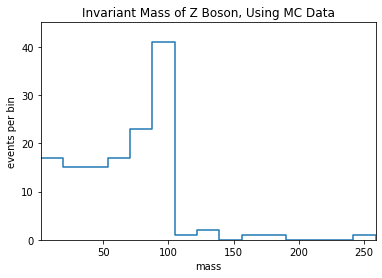

In [563]:
#plot histogram of invariant mass of Z boson using the MC simulated data
counts, edges = np.histogram(invmass.flatten(), bins=15)
plt.step(x=edges, y=np.append(counts, 0), where="post");
plt.xlim(edges[0], edges[-1]);
plt.ylim(0, counts.max() * 1.1);
plt.xlabel("mass");
plt.ylabel("events per bin");
plt.title("Invariant Mass of Z Boson, Using MC Data")

In [564]:
#open 4 lepton data using uproot
file2 = uproot.open("data_A.4lep.root")["mini"]

E2, pt2, eta2, phi2 = file2.arrays(["lep_E", "lep_pt", "lep_eta", "lep_phi"], outputtype=tuple)
n2, charge2, lep_type2 = file2.arrays(["lep_n", "lep_charge", "lep_type"], outputtype=tuple)

n2

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=uint32)

In [565]:
c2 = charge2.distincts()

t2 = lep_type2.distincts()

In [566]:
#create maskc2
leftc2, rightc2 = c2.unzip()
leftc2, rightc2

maskc2 = leftc2 != rightc2

In [567]:
c_oppo2 = c2[maskc2]

In [568]:
#create maskt2
t_oppo2= t2[maskc2]

leftt2, rightt2 = t_oppo2.unzip()
leftt2, rightt2

maskt2 = leftt2 == rightt2

In [569]:
#choose the pt, eta, phi, and E values of lepton pairs that satisfy cuts
pt1_2 = pt2.distincts()
pt1_oppo2 = pt1_2[maskc2]
pt1_t2 = pt1_oppo2[maskt2]

leftpt2, rightpt2 = pt1_t2.unzip()

eta1_2 = eta2.distincts()
eta1_oppo2 = eta1_2[maskc2]
eta1_t2 = eta1_oppo2[maskt2]

lefteta2, righteta2 = eta1_t2.unzip()

phi1_2 = phi2.distincts()
phi1_oppo2 = phi1_2[maskc2]
phi1_t2 = phi1_oppo2[maskt2]

leftphi2, rightphi2 = phi1_t2.unzip()

E1_2 = E2.distincts()
E1_oppo2 = E1_2[maskc2]
E1_t2 = E1_oppo2[maskt2]

leftE2, rightE2 = E1_t2.unzip()

In [570]:
#split into left and right 
left_lep2 = uproot_methods.TLorentzVectorArray.from_ptetaphie(leftpt2/1000., lefteta2, leftphi2, leftE2/1000.)
right_lep2 = uproot_methods.TLorentzVectorArray.from_ptetaphie(rightpt2/1000., righteta2, rightphi2, rightE2/1000.)


invmass2 = np.sqrt(((left_lep2.t + right_lep2.t)**2) - (left_lep2.x + right_lep2.x)**2 -
                    (left_lep2.y + right_lep2.y)**2 - (left_lep2.z + right_lep2.z)**2)

Text(0.5, 1.0, 'Invariant Mass of Z Boson')

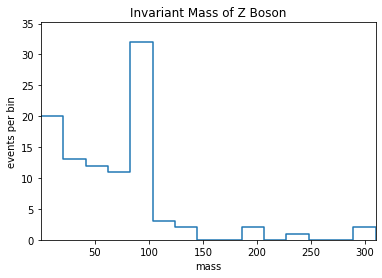

In [571]:
#plot histogram of invariant mass of Z boson using 4 lepton data
counts, edges = np.histogram(invmass2.flatten(), bins=15)
plt.step(x=edges, y=np.append(counts, 0), where="post");
plt.xlim(edges[0], edges[-1]);
plt.ylim(0, counts.max() * 1.1);
plt.xlabel("mass");
plt.ylabel("events per bin");
plt.title("Invariant Mass of Z Boson")